Implement fuzzy logic to generate rule base for predicting relative humidity based on climatic features. Use weather data from Kaggle

[link to notebook](https://www.kaggle.com/code/prakharrathi25/predicting-humidity-using-decision-tree-algorithm/data)

Input_params: ```air_pressure_9am, air_temp_9am, avg_wind_direction_9am, avg_wind_speed_9am, max_wind_direction_9am, max_wind_speed_9am, rain_accumulation_9am, rain_duration_9am```

Output: ```relative_humidity_9am```

In [ ]:
!pip install --upgrade pip
!pip install scikit-fuzzy

In [ ]:
# imports
import pandas as pd
import numpy as np
from skfuzzy import control as ctrl
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# upload file
from google.colab import files
uploades = files.upload()

Saving daily_weather.csv to daily_weather (1).csv


In [ ]:
df = pd.read_csv("daily_weather.csv")
df.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [ ]:
df.drop(["number", "relative_humidity_3pm"], axis=1, inplace=True)
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000


In [ ]:
df.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
count,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000
mean,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402
std,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067
min,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000
25%,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243
50%,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259
75%,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000
max,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000


In [ ]:
sns.pairplot(df, hue="relative_humidity_9am")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

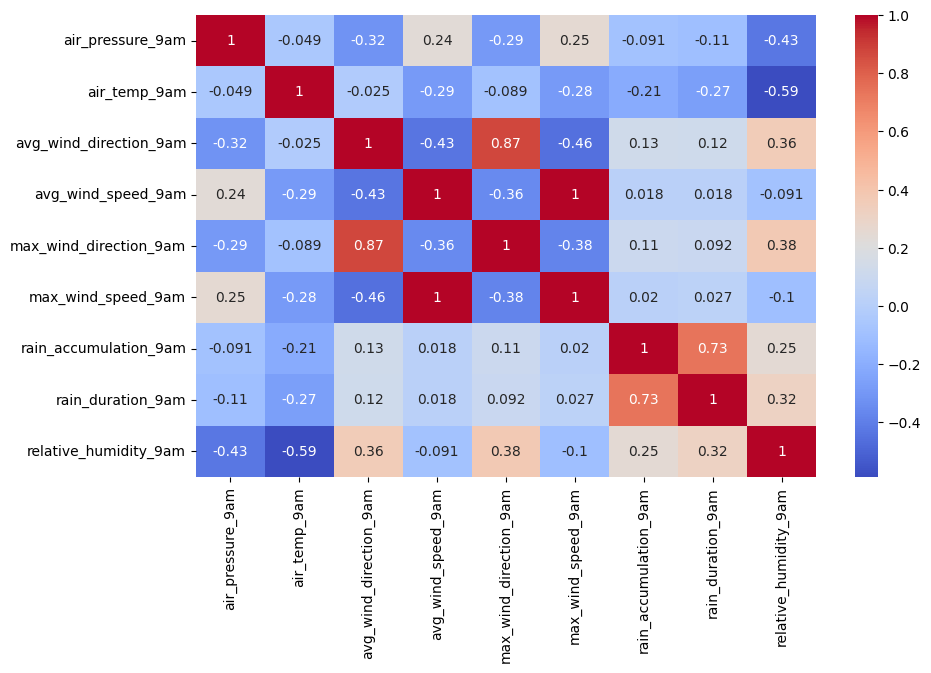

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()

In [ ]:
# Sum of NaN values in each column
df.isnull().sum()

# Drop the NaN values
df = df.dropna()

In [ ]:
# Define fuzzy variables and Generate fuzzy membership functions
air_pressure = ctrl.Antecedent(np.linspace(900, 1020, 100), 'air_pressure_9am')
air_pressure.automf(3)
air_temp = ctrl.Antecedent(np.linspace(0, 40, 100), 'air_temp_9am')
air_temp.automf(3)
avg_wind_direction = ctrl.Antecedent(np.linspace(0, 360, 100), 'avg_wind_direction_9am')
avg_wind_direction.automf(3)
avg_wind_speed = ctrl.Antecedent(np.linspace(0, 30, 100), 'avg_wind_speed_9am')
avg_wind_speed.automf(3)
max_wind_direction = ctrl.Antecedent(np.linspace(0, 360, 100), 'max_wind_direction_9am')
max_wind_direction.automf(3)
max_wind_speed = ctrl.Antecedent(np.linspace(0, 40, 100), 'max_wind_speed_9am')
max_wind_speed.automf(3)
rain_accumulation = ctrl.Antecedent(np.linspace(0, 50, 100), 'rain_accumulation_9am')
rain_accumulation.automf(3)
rain_duration = ctrl.Antecedent(np.linspace(0, 1000, 100), 'rain_duration_9am')
rain_duration.automf(3)
humidity = ctrl.Consequent(np.linspace(0, 100, 100), 'relative_humidity_9am')
humidity.automf(3)

In [ ]:
# Define fuzzy rules
rule1 = ctrl.Rule(air_pressure['poor'] | air_temp['poor'], humidity['good'])
rule2 = ctrl.Rule(avg_wind_direction['poor'] | avg_wind_speed['average'], humidity['poor'])
rule3 = ctrl.Rule(max_wind_direction['good'] | max_wind_speed['average'], humidity['good'])
rule4 = ctrl.Rule(rain_accumulation['poor'] | rain_duration['good'], humidity['poor'])

In [ ]:
# Create control system and simulation
humidity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
humidity_sim = ctrl.ControlSystemSimulation(humidity_ctrl)

In [ ]:
# Initialize an empty list to store predicted humidity values
predicted_humidity = []

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    # Set the input values for the simulation
    humidity_sim.input['air_pressure_9am'] = row['air_pressure_9am']
    humidity_sim.input['air_temp_9am'] = row['air_temp_9am']
    humidity_sim.input['avg_wind_direction_9am'] = row['avg_wind_direction_9am']
    humidity_sim.input['avg_wind_speed_9am'] = row['avg_wind_speed_9am']
    humidity_sim.input['max_wind_direction_9am'] = row['max_wind_direction_9am']
    humidity_sim.input['max_wind_speed_9am'] = row['max_wind_speed_9am']
    humidity_sim.input['rain_accumulation_9am'] = row['rain_accumulation_9am']
    humidity_sim.input['rain_duration_9am'] = row['rain_duration_9am']

    # Perform the fuzzy inference
    humidity_sim.compute()

    # Append the predicted humidity to the list
    predicted_humidity.append(humidity_sim.output['relative_humidity_9am'])

# Convert the list to a DataFrame column for comparison or further analysis
df['predicted_humidity_9am'] = predicted_humidity

In [ ]:
# Display the DataFrame with the actual and predicted humidity
print(df[['relative_humidity_9am', 'predicted_humidity_9am']])

      relative_humidity_9am  predicted_humidity_9am
0                 42.420000               47.865769
1                 24.328697               48.029371
2                  8.900000               49.732332
3                 12.189102               47.253235
4                 92.410000               50.055563
...                     ...                     ...
1090              26.020000               47.664194
1091              90.350000               47.710612
1092              45.590000               48.193928
1093              64.840000               48.951666
1094              14.560000               46.971319

[1064 rows x 2 columns]


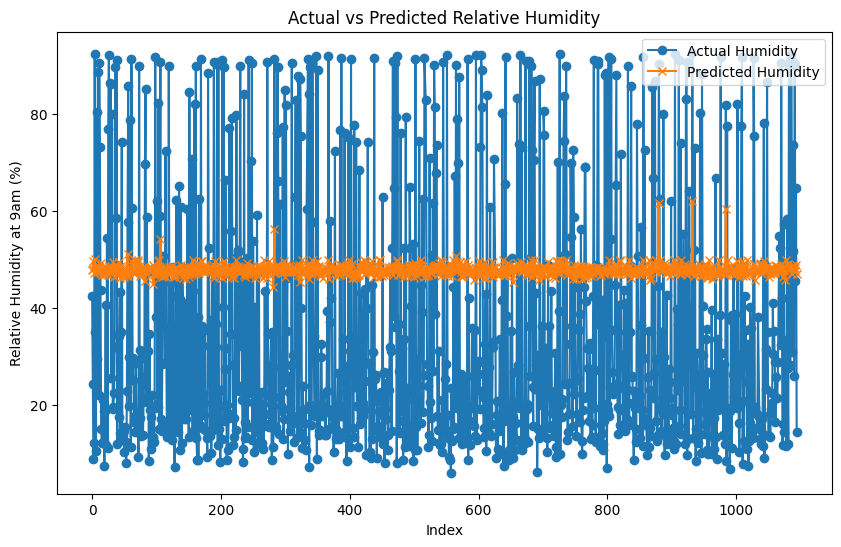

In [ ]:
# Plotting the actual vs predicted relative humidity
plt.figure(figsize=(10, 6))
plt.plot(df['relative_humidity_9am'], label='Actual Humidity', marker='o')
plt.plot(df['predicted_humidity_9am'], label='Predicted Humidity', marker='x')
plt.xlabel('Index')
plt.ylabel('Relative Humidity at 9am (%)')
plt.title('Actual vs Predicted Relative Humidity')
plt.legend()
plt.show()

In [ ]:
df.loc[:, ['relative_humidity_9am','predicted_humidity_9am']].corr()

,relative_humidity_9am,predicted_humidity_9am
relative_humidity_9am,1.000000,0.237856
predicted_humidity_9am,0.237856,1.000000
